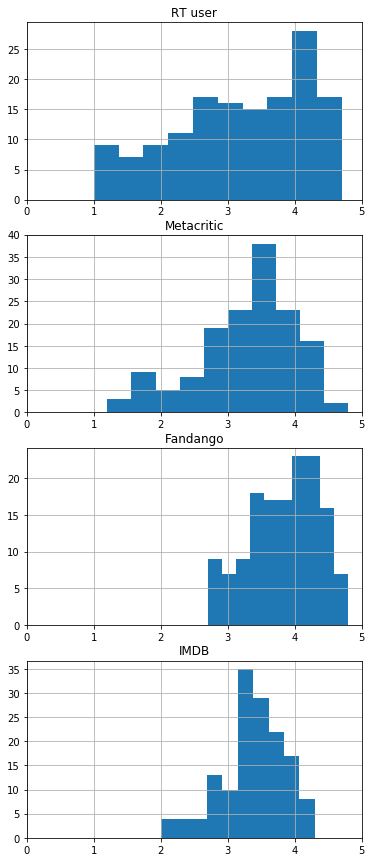

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
movie_reviews = pd.read_csv("fandango_score_comparison.csv")

fig = plt.figure(figsize =(6,15))
ax1 = fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3 = fig.add_subplot(4,1,3)
ax4 = fig.add_subplot(4,1,4)

ax1.set_xlim(0,5.0)
ax2.set_xlim(0,5.0)
ax3.set_xlim(0,5.0)
ax4.set_xlim(0,5.0)

ax1.set_title("RT user")
ax2.set_title("Metacritic")
ax3.set_title("Fandango")
ax4.set_title("IMDB")

movie_reviews["RT_user_norm"].hist(ax=ax1)
movie_reviews["Metacritic_user_nom"].hist(ax=ax2)
movie_reviews["Fandango_Ratingvalue"].hist(ax=ax3)
movie_reviews["IMDB_norm"].hist(ax=ax4)

plt.show()


In [8]:
def calc_mean(series):
    
    return series.mean()

cols =['RT_user_norm','Metacritic_user_nom','Fandango_Ratingvalue','IMDB_norm']

user_reviews = movie_reviews[cols]
user_reviews_means = user_reviews.apply(calc_mean)

rt_mean = user_reviews_means["RT_user_norm"]
mc_mean = user_reviews_means["Metacritic_user_nom"]
fg_mean = user_reviews_means["Fandango_Ratingvalue"]
id_mean = user_reviews_means["IMDB_norm"]


print("Rotten Tomatoes (mean):", rt_mean)
print("Metacritic (mean):", mc_mean)
print("Fandango (mean):",fg_mean)
print("IMDB (mean):",id_mean)

Rotten Tomatoes (mean): 3.19383561644
Metacritic (mean): 3.2595890411
Fandango (mean): 3.84520547945
IMDB (mean): 3.36849315068


In [9]:
def calc_mean(series):
    vals = series.values
    mean = sum(vals) / len(vals)
    return mean
def calc_variance(series):
    mean = calc_mean(series)
    squared_deviations = (series - mean)**2
    mean_squared_deviations = calc_mean(squared_deviations)
    return mean_squared_deviations

columns = ["RT_user_norm", "Metacritic_user_nom", "Fandango_Ratingvalue", "IMDB_norm"]
user_reviews = movie_reviews[columns]
user_reviews_variances = user_reviews.apply(calc_variance)

rt_var = user_reviews_variances["RT_user_norm"]
mc_var = user_reviews_variances["Metacritic_user_nom"]
fg_var = user_reviews_variances["Fandango_Ratingvalue"]
id_var = user_reviews_variances["IMDB_norm"]

rt_stdev = rt_var ** (1/2)
mc_stdev = mc_var ** (1/2)
fg_stdev = fg_var ** (1/2)
id_stdev = id_var ** (1/2)

print("Rotten Tomatoes (variance):", rt_var)
print("Metacritic (variance):", mc_var)
print("Fandango (variance):", fg_var)
print("IMDB (variance):", id_var)

print("Rotten Tomatoes (standard deviation):", rt_stdev)
print("Metacritic (standard deviation):", mc_stdev)
print("Fandango (standard deviation):", fg_stdev)
print("IMDB (standard deviation):", id_stdev)

Rotten Tomatoes (variance): 0.995578438731
Metacritic (variance): 0.566654625633
Fandango (variance): 0.251107149559
IMDB (variance): 0.228219647213
Rotten Tomatoes (standard deviation): 0.997786770173
Metacritic (standard deviation): 0.752764654878
Fandango (standard deviation): 0.501105926486
IMDB (standard deviation): 0.47772340032


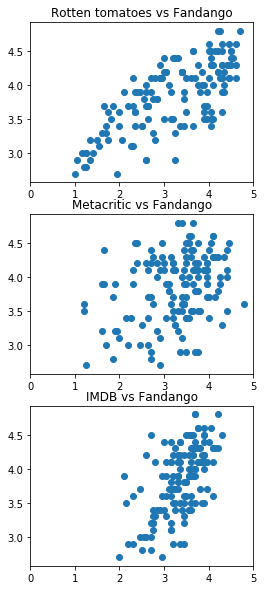

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

fig = plt.figure(figsize=(4,10))

ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

ax1.set_xlim(0.0,5.0)
ax2.set_xlim(0.0,5.0)
ax3.set_xlim(0.0,5.0)

ax1.set_title("Rotten tomatoes vs Fandango")
ax2.set_title("Metacritic vs Fandango")
ax3.set_title("IMDB vs Fandango")

ax1.scatter(movie_reviews["RT_user_norm"], movie_reviews["Fandango_Ratingvalue"])
ax2.scatter(movie_reviews["Metacritic_user_nom"], movie_reviews["Fandango_Ratingvalue"])
ax3.scatter(movie_reviews["IMDB_norm"], movie_reviews["Fandango_Ratingvalue"])

plt.show()

>It seems like Rotten Tomatoes and IMDB user reviews correlate the most with Fandango user reviews while Metacritic only weakly correlates.

In [14]:
def calc_mean(series):
    vals = series.values
    mean = sum(vals) / len(vals)
    return mean
def calc_covariance(series_one, series_two):
    x = series_one.values
    y = series_two.values
    x_mean = calc_mean(series_one)
    y_mean = calc_mean(series_two)
    x_diffs = [i - x_mean for i in x]
    y_diffs = [i - y_mean for i in y]
    codeviates = [x_diffs[i] * y_diffs[i] for i in range(len(x))]
    return sum(codeviates) / len(codeviates)

rt_fg_covar = calc_covariance(movie_reviews["RT_user_norm"], movie_reviews["Fandango_Ratingvalue"])
mc_fg_covar = calc_covariance(movie_reviews["Metacritic_user_nom"], movie_reviews["Fandango_Ratingvalue"])
id_fg_covar = calc_covariance(movie_reviews["IMDB_norm"], movie_reviews["Fandango_Ratingvalue"])

print("Covariance between Rotten Tomatoes and Fandango:", rt_fg_covar)
print("Covariance between Metacritic and Fandango", mc_fg_covar)
print("Covariance between IMDB and Fandango", id_fg_covar)

Covariance between Rotten Tomatoes and Fandango: 0.362162225558
Covariance between Metacritic and Fandango 0.127100769375
Covariance between IMDB and Fandango 0.143718802777


> Rotten Tomatoes covaries strongly with Fandango (0.36) compared to Metacritic (0.13) and IMDB (0.14).

In [15]:
def calc_mean(series):
    vals = series.values
    mean = sum(vals) / len(vals)
    return mean

def calc_variance(series):
    mean = calc_mean(series)
    squared_deviations = (series - mean)**2
    mean_squared_deviations = calc_mean(squared_deviations)
    return mean_squared_deviations

def calc_covariance(series_one, series_two):
    x = series_one.values
    y = series_two.values
    x_mean = calc_mean(series_one)
    y_mean = calc_mean(series_two)
    x_diffs = [i - x_mean for i in x]
    y_diffs = [i - y_mean for i in y]
    codeviates = [x_diffs[i] * y_diffs[i] for i in range(len(x))]
    return sum(codeviates) / len(codeviates)

rt_fg_covar = calc_covariance(movie_reviews["RT_user_norm"], movie_reviews["Fandango_Ratingvalue"])
mc_fg_covar = calc_covariance(movie_reviews["Metacritic_user_nom"], movie_reviews["Fandango_Ratingvalue"])
id_fg_covar = calc_covariance(movie_reviews["IMDB_norm"], movie_reviews["Fandango_Ratingvalue"])
def calc_correlation(series_one, series_two):
    numerator = calc_covariance(series_one, series_two)
    series_one_std = calc_variance(series_one) ** (1/2)
    series_two_std = calc_variance(series_two) ** (1/2)
    denominator = series_one_std * series_two_std
    correlation = numerator / denominator
    return correlation

rt_fg_corr = calc_correlation(movie_reviews["RT_user_norm"], movie_reviews["Fandango_Ratingvalue"])
mc_fg_corr = calc_correlation(movie_reviews["Metacritic_user_nom"], movie_reviews["Fandango_Ratingvalue"])
id_fg_corr = calc_correlation(movie_reviews["IMDB_norm"], movie_reviews["Fandango_Ratingvalue"])

print("Correlation between Rotten Tomatoes and Fandango", rt_fg_corr)
print("Correlation between Metacritic and Fandango", mc_fg_corr)
print("Correlation between IMDB and Fandango", id_fg_corr)

Correlation between Rotten Tomatoes and Fandango 0.724328994249
Correlation between Metacritic and Fandango 0.336945314265
Correlation between IMDB and Fandango 0.600354177263


> As the scatter plots suggested, Rotten Tomatoes and IMDB correlate the strongest with Fandango, with correlation values of 0.72 and 0.60 respectively. Metacritic, on the other hand, only has a correlation value of 0.34 with Fandango. While covariance and correlation values may seem complicated to compute and hard to reason with, their best use case is in comparing relationships